In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from tqdm import tqdm_notebook as tqdm
import frgtools.plotting as frgplt
import seaborn as sns
from mpl_toolkits.axes_grid1 import AxesGrid
from frgtools import misc
from tqdm import tqdm

In [3]:
# allx = []
# ally = []
# for f in fids:
#     allx.append(float(f.split('X')[-1].split('_')[1]))
#     ally.append(float(f.split('Y')[-1].split('_')[1]))

# allx = np.array(allx)
# ally = np.array(ally)

In [4]:
x = np.unique(allx)
y = np.unique(ally)
x.sort()
y.sort()

NameError: name 'allx' is not defined

In [ ]:
# temp = np.loadtxt(os.path.join(dataDir, fids[0]))
# wl = shift_to_nm(temp[:,0])

In [ ]:
a = [1,2,3]
b = ['ab', 'cd', 'ef']

for a_, b_ in zip(a, b):
    print('{}:{}'.format(a_,b_))

In [ ]:
# cts = np.zeros((len(y), len(x), len(wl)))
# for f, x_, y_ in zip(fids, allx, ally):
#     m = np.where(y == y_)
#     n = np.where(x == x_)
#     cts[m,n] = np.loadtxt(os.path.join(dataDir, f))[:,1]    

In [3]:
def shift_to_nm(shift, incident_wl = 633):
    incident_wn = 1/(incident_wl * 1e-7)
    exit_wn = incident_wn - shift
    return 1e7/exit_wn 

def loadRenishaw(path, incident_wl = 633):
    fids = [os.path.join(path, x) for x in os.listdir(path)]
    allx = []
    ally = []
    for f in fids:
        allx.append(float(f.split('X')[-1].split('_')[1]))
        ally.append(float(f.split('Y')[-1].split('_')[1]))
    allx = np.array(allx)
    ally = np.array(ally)
    x = np.unique(allx)
    y = np.unique(ally)
    x.sort()
    y.sort()
    
    temp = np.loadtxt(fids[0])
    wl = shift_to_nm(temp[:,0], incident_wl = incident_wl)
    
    cts = np.zeros((len(y), len(x), len(wl)))
    for f, x_, y_ in tqdm(zip(fids, allx, ally), total = len(fids)):
        m = np.where(y == y_)
        n = np.where(x == x_)
        cts[m,n] = np.loadtxt(f)[:,1]    
    
    extent = [x[0], x[-1], y[0], y[-1]]
    return wl, cts, extent

In [5]:
files[0]

NameError: name 'files' is not defined

In [5]:
files = misc.listdir('20200309_PLQ_Deniz_HTLPassivation_MK')


Files in '20200309_PLQ_Deniz_HTLPassivation_MK':
0:02_BenzOH_old
1:03_TOPO
2:04_BA
3:02_BenzOH
4:01_PhEtOH
5:05_C
6:Run Notes.txt


In [6]:
wl, TOPO, extent_TOPO = loadRenishaw(files[1])
wl, BA, extent_BA = loadRenishaw(files[2])
wl, BenzOH, extent_BenzOH = loadRenishaw(files[3])
wl, PhEtOH, extent_PhEtOH = loadRenishaw(files[4])
wl, C, extent_C = loadRenishaw(files[5])

# wl, BenzOH, extent_control = loadRenishaw(files[3])


# wl, topo, extent_topo = loadRenishaw('')
# wl, to, extent_to = loadRenishaw('TO-5x')

100%|██████████| 900/900 [00:04<00:00, 195.32it/s]


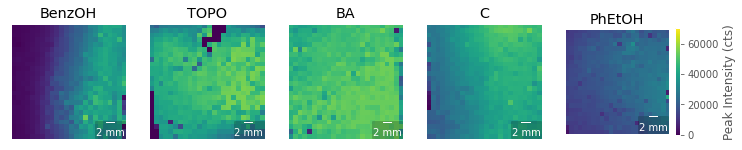

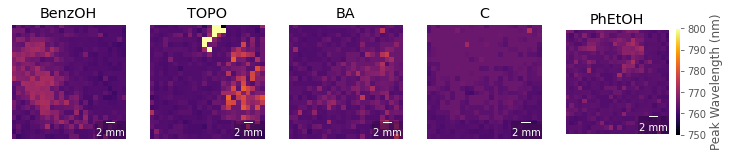

In [8]:
fig, ax = plt.subplots(1,5, figsize = (12,5))
for ax_, im_, label_, ext_ in zip(ax, [BenzOH, TOPO, BA, C, PhEtOH], ['BenzOH', 'TOPO', 'BA', 'C', 'PhEtOH'], [extent_BenzOH, extent_TOPO, extent_BA, extent_C, extent_PhEtOH]):
    temp = ax_.imshow(
        im_[3:-3, 3:-3].max(axis = 2),
        vmin = 0,
        vmax = 70000,
        extent = ext_
    )
    ax_.set_title(label_)
    ax_.set_xticks([])
    ax_.set_yticks([])
    frgplt.Scalebar(ax_, scale = 1e-6)
    
cb = plt.colorbar(temp, ax = ax[-1], fraction = 0.046)
cb.set_label('Peak Intensity (cts)')
plt.savefig('PL Mapping_intensity', dpi = 300, bbox_inches = 'tight')

plt.show()

fig, ax = plt.subplots(1,5, figsize = (12,5))
for ax_, im_, label_, ext_ in zip(ax, [BenzOH, TOPO, BA, C, PhEtOH], ['BenzOH', 'TOPO', 'BA', 'C', 'PhEtOH'], [extent_BenzOH, extent_TOPO, extent_BA, extent_C, extent_PhEtOH]):
    temp = ax_.imshow(
        wl[np.argmax(im_[3:-3, 3:-3], axis = 2)],
        vmin = 750,
        vmax = 800,
        cmap = plt.cm.inferno,
        extent = ext_
    )
    frgplt.Scalebar(ax_, scale = 1e-6)
    ax_.set_title(label_)
    ax_.set_xticks([])
    ax_.set_yticks([])
cb = plt.colorbar(temp, ax = ax[-1], fraction = 0.046)
cb.set_label('Peak Wavelength (nm)')
plt.savefig('PL Mapping_wl', dpi = 300, bbox_inches = 'tight')
plt.show()

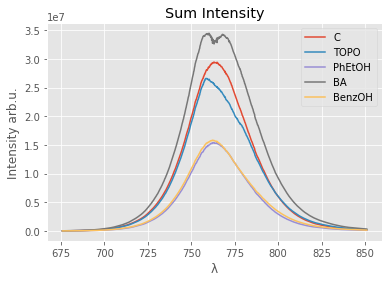

In [14]:

plt.plot(wl, C.sum(axis = (0,1)), label = 'C')
plt.plot(wl, TOPO.sum(axis = (0,1)), label = 'TOPO')
plt.plot(wl, PhEtOH.sum(axis = (0,1)), label = 'PhEtOH')
plt.plot(wl, BA.sum(axis = (0,1)), label = 'BA')
plt.plot(wl, BenzOH.sum(axis = (0,1)), label = 'BenzOH')


plt.legend()
plt.title('Sum Intensity')

plt.ylabel('Intensity arb.u.')
plt.xlabel('λ')

plt.savefig('PL Sum Intensity', dpi = 300, bbox_inches = 'tight')
plt.show()

In [15]:
sns.kdeplot(control[3:-3, 3:-3].max(axis = 2).ravel(), kernel = 'gau', bw = 100, label = 'Control')
sns.kdeplot(topo[3:-3, 3:-3].max(axis = 2).ravel(), kernel = 'gau', bw = 100, label = 'TOPO')
sns.kdeplot(to[3:-3, 3:-3].max(axis = 2).ravel(), kernel = 'gau', bw = 100, label = 'TO')

plt.legend()
plt.xlabel('Peak Intensity (cts)')
plt.ylabel('%')
plt.xlim((30000, 45000))
plt.show()

NameError: name 'control' is not defined

In [16]:
sns.kdeplot(wl[np.argmax(control[3:-3, 3:-3], axis = 2)].ravel(), kernel = 'gau', bw = 2, label = 'Control')
sns.kdeplot(wl[np.argmax(topo[3:-3, 3:-3], axis = 2)].ravel(), kernel = 'gau', bw = 2, label = 'TOPO')
sns.kdeplot(wl[np.argmax(to[3:-3, 3:-3], axis = 2)].ravel(), kernel = 'gau', bw = 2, label = 'TO')

plt.legend()
plt.xlabel('Peak Wavelength (nm)')
plt.ylabel('%')
plt.xlim((750, 800))
plt.show()

NameError: name 'control' is not defined

In [17]:
import scipy.

for x, l in zip([control, topo, to], ['Control', 'TOPO', 'TO']):
    plt.scatter(
        x[3:-3, 3:-3].max(axis = 2).ravel(),
        wl[np.argmax(x[3:-3, 3:-3], axis = 2)].ravel(),
        label = l,
        s = 3
    )
plt.legend()
plt.xlabel('Peak Intensity (cts)')
plt.ylabel('Peak Wavelength (nm)')
plt.xlim(left = 20000)
plt.ylim((755, 770))
plt.show()



SyntaxError: invalid syntax (<ipython-input-17-1756d7ed45bd>, line 1)